# <font color="red">Lecture 07 - Linear Regression Code</font>

In [1]:
#importing necessary module and datasets
import pandas as pd
df = pd.read_csv('Datasets/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


=> datasets is loaded now

In [2]:
df.info() #checking datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.isnull().sum() #checking null value exist or not

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

=> no null value exist

### Preprocessing data

=> we have some object type data, so we need to encode them first

In [4]:
for column in df.columns:
    if df[column].dtype == object:
        unique_values_count = df[column].value_counts()
        print(f"Column: {column}")
        print(unique_values_count)
        print()

Column: mainroad
mainroad
yes    468
no      77
Name: count, dtype: int64

Column: guestroom
guestroom
no     448
yes     97
Name: count, dtype: int64

Column: basement
basement
no     354
yes    191
Name: count, dtype: int64

Column: hotwaterheating
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Column: airconditioning
airconditioning
no     373
yes    172
Name: count, dtype: int64

Column: prefarea
prefarea
no     417
yes    128
Name: count, dtype: int64

Column: furnishingstatus
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64



=> we can see all have yes, no value that can be rank automatically except furnishingstatus\
=> we can use OrdinalEncoder to encode them in order except furnishingstatus, which need to make order manually

In [5]:
#importing encoder
#ordinal encoder keep consider the order of categorical data
#Like small = 0, medium = 1, big = 2
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder() #creating an instance of that encoder

In [6]:
#using loop for easy encode
for x in df.columns:
    if df[x].dtype == object and x != 'furnishingstatus': #automation can't detect the order of this columns so we need to apply encoder manualy
        df[x] = enc.fit_transform(df[[x]]) #this encoder require 2D array

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished


=> so, now we need to encode the furnishing status using manual rank

In [8]:
df['furnishingstatus'].unique() #checking the value of that column

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [9]:
rank = ['unfurnished', 'semi-furnished', 'furnished'] #defining the rank or order

oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['furnishingstatus'] = oe.fit_transform(df[['furnishingstatus']]) #encoding the column

In [10]:
df.head() #checking

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0


In [11]:
df.info() #checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 55.5 KB


In [12]:
duplicates =  df[df.duplicated(keep='first')] #checking if it is duplicate free or not
len(duplicates)

0

=> now the dataset is ready for model

In [13]:
#importing module
import matplotlib.pyplot as plt
import seaborn as sns

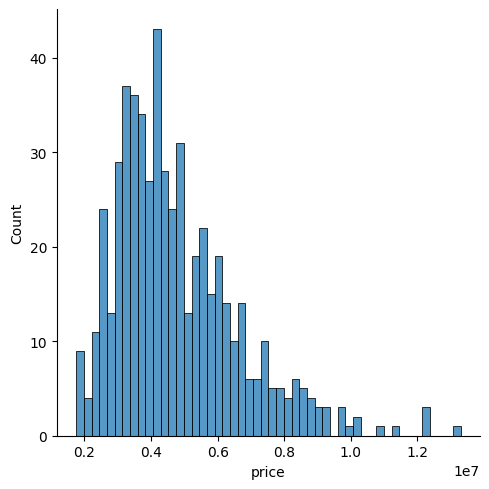

In [14]:
sns.displot(df['price'], bins = 50) #checking the price distribution

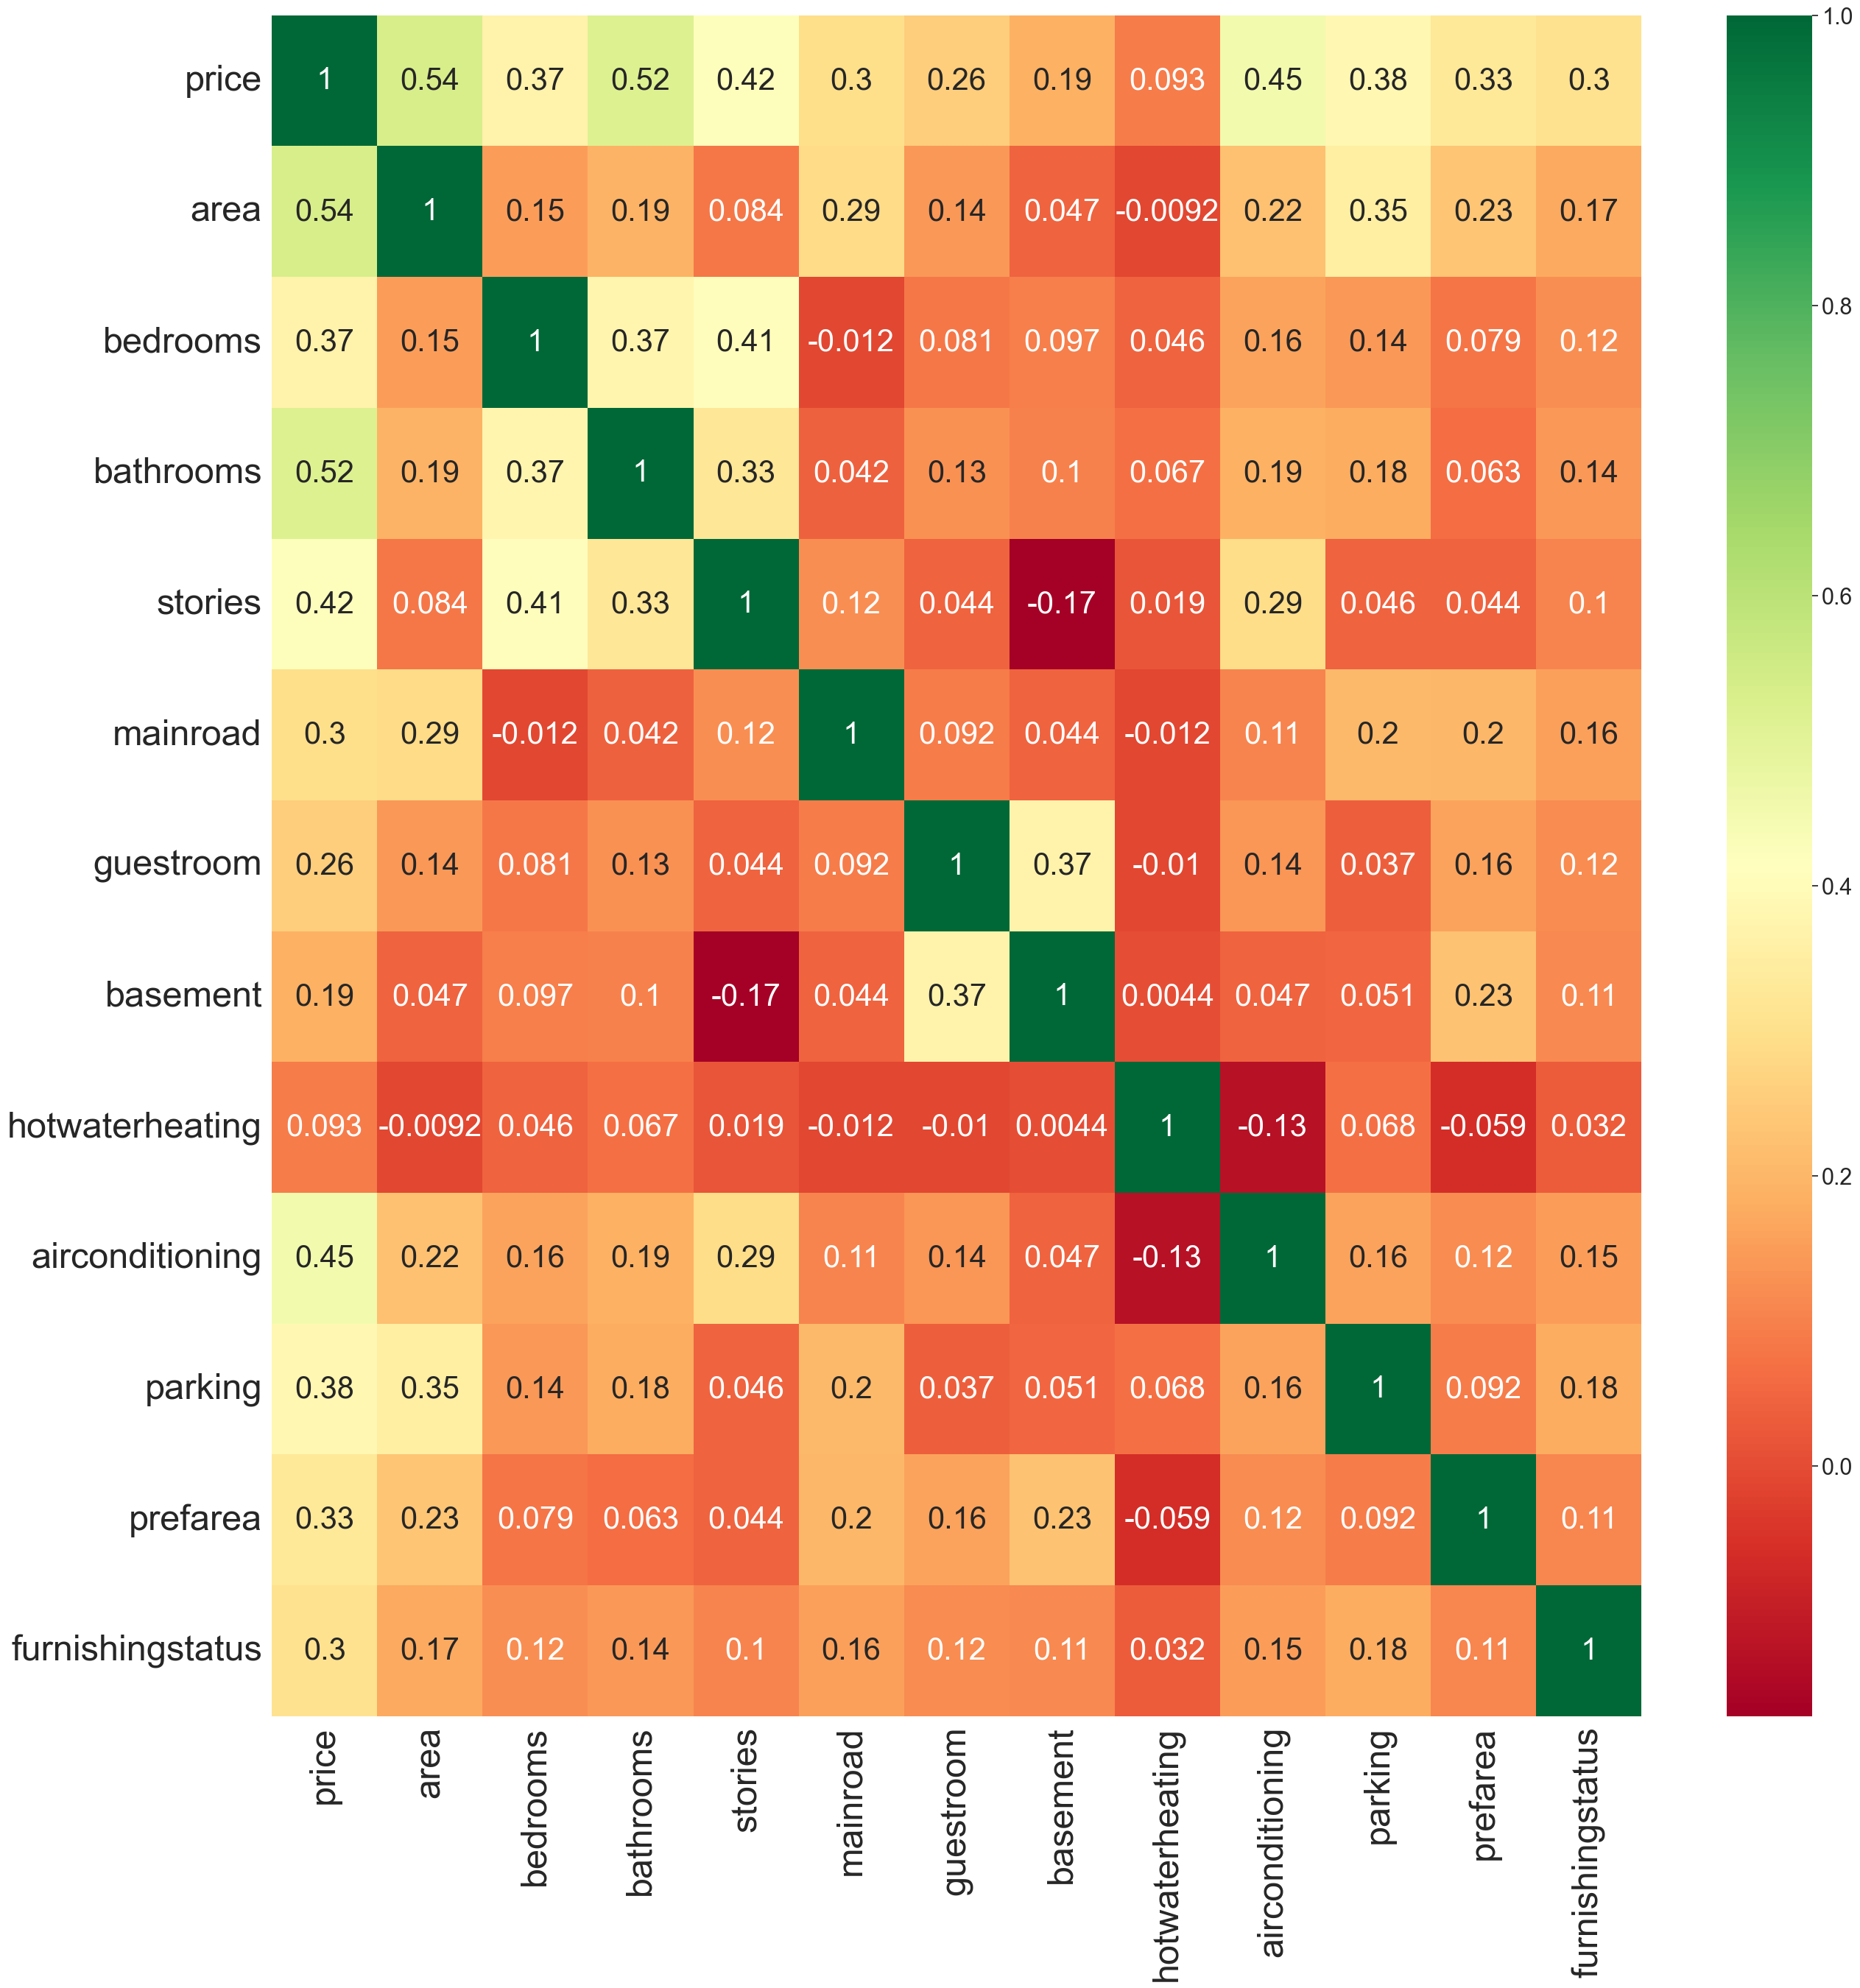

In [15]:
#observing the heatmap to see the important feature that impacting on price

sns.set(font_scale = 2)
plt.subplots(figsize = (30, 30))
heat_plot = sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws = {'size': 30})

plt.yticks(fontsize = 35)
plt.xticks(fontsize = 35)

plt.show()

In [16]:
correlation = df.corr(method = 'pearson') #finding all correlation between each features
print(correlation['price'].sort_values(ascending = False).to_string()) #printing correlation with price in descending order

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073


=> we can drop hotwaterheating, as its impact is very low on price

In [17]:
#separating features and target
X = df.drop(['price'], axis = 1)
X #datasets of all features

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,0.0
541,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0
543,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0


In [18]:
y = df['price']
y #datasets of target only

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [19]:
#checking the shape of features and target
print(X.shape)
print(y.shape)

(545, 12)
(545,)


=> 12 features and 545 sample

=> now we need to split the datasets in train and test

In [20]:
#importing module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#by default these split happened in 75-25% but we are definging here as 80-20% as it is standard case
#most of the time

In [21]:
#checking split
print("X_train: ", len(X_train))
print("y_train: ", len(y_train))
print("\nX_test: ", len(X_test))
print("y_test: ", len(y_test))

X_train:  436
y_train:  436

X_test:  109
y_test:  109


=> now we need to scale the data

In [22]:
#using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler #importing scaler

scaler = MinMaxScaler() #creating an instance

#we can scale the features only, not the target
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
X_train #checking

array([[0.04295533, 0.4       , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.15051546, 0.4       , 0.        , ..., 0.33333333, 1.        ,
        0.5       ],
       [0.49656357, 0.4       , 0.        , ..., 0.33333333, 0.        ,
        0.5       ],
       ...,
       [0.30171821, 0.4       , 0.        , ..., 0.66666667, 1.        ,
        0.5       ],
       [0.54776632, 0.4       , 0.        , ..., 0.66666667, 1.        ,
        1.        ],
       [0.34845361, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
X_test #checking

array([[0.17188075, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15311005, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.43687891, 1.        , 0.5       , ..., 0.66666667, 0.        ,
        0.        ],
       ...,
       [0.13507545, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19322782, 0.66666667, 0.        , ..., 0.33333333, 0.        ,
        0.5       ],
       [0.61428046, 0.        , 0.        , ..., 0.33333333, 1.        ,
        0.5       ]])

### <font color="red">Now lets train the model</font>

In [25]:
#importing the model first
from sklearn.linear_model import LinearRegression

reg = LinearRegression() #creating an instance of the model using default parameter

### LinearRegression have four parameters
1. fit_intercept => default = True => if false, regression fit line will cross thru the center of axis, which is not good for al time
2. copy_x => default = True => it will make a copy of features and manipulate on that copy, original data will remain same
4. n_jobs => default = None => use for parallel run
5. positive => default = False => if true, it will force the coefficient of X to be positive

In [26]:
reg

LinearRegression()

=> the model color is redish now, that means model is not fitted or not ready for train\
=> Now we need to make a connection between features and target in the model

In [27]:
reg.fit(X_train, y_train) #making relation between features and target
#we are using train data only, test data need to be stay as unseen data, until train is finish

LinearRegression()

=> now the model is fitted and trained, we can check the prediction now\
=> so, why wait!! lets start predict the price

In [28]:
#passing the test data for predict and storing it in a variable
#so that we can check the accuracy by comparing the prediction with y_test
y_pred = reg.predict(X_test)

In [29]:
y_pred #checking predicted data

array([2920139.81886189, 4473039.47157337, 7775972.93812453,
       3659560.72653603, 3513911.81896881, 3018073.61317383,
       7465934.70286088, 4898452.20923451, 4928111.00340793,
       3925529.19864974, 8894390.14372575, 6682367.48693128,
       4037383.55554267, 3627685.30700948, 6738392.08911901,
       3289057.98960241, 2822953.34208207, 6252746.25797275,
       4824676.3848882 , 6398614.18692579, 7530440.48077679,
       8382266.45257821, 7090785.89943053, 8070472.40624925,
       4329817.20610771, 3158845.43919597, 4534902.16123571,
       5847635.9798304 , 3529094.138826  , 7187495.0473874 ,
       2436484.86003348, 4620738.78242893, 7015807.16174931,
       4186730.4319985 , 6835083.58524239, 4800648.93671151,
       3154574.10565092, 4589170.24101937, 4494232.26802563,
       7806537.47762998, 3611038.70616211, 3451680.18933201,
       3219081.85386041, 4881249.61443267, 8922804.79929604,
       5420548.15763067, 5012007.72593338, 3881655.97408962,
       6452130.05091622,

In [30]:
y_test #original price

214    4865000
201    4900000
28     8400000
520    2450000
193    5033000
        ...   
387    3500000
241    4550000
458    3115000
137    5740000
277    4305000
Name: price, Length: 109, dtype: int64

In [31]:
#importing error module
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [32]:
R2 = r2_score(y_pred, y_test) #checking R2 Score
R2

0.5505398436063562

In [33]:
MSE = mean_squared_error(y_pred, y_test) #checking Mean Squared Error
MSE

1403956695718.3997

In [34]:
RMSE = math.sqrt(MSE) #checking Root Mean Squared Error
RMSE

1184886.7860341761

In [35]:
MAE = mean_absolute_error(y_pred, y_test) #cehcking Mean Absolute Error
MAE

923552.0489130002

=> Error is too high here

### In Linear Regression, we calculate the error, not accuracy
### Accuracy need to check in classification
### In Linear Regression, our predict can't be exact. so, if we check accuracy, it will give 0%

# <center><font size="50" color="red">Thank You</font></center>